In [1]:
from sklearn.feature_extraction.text import CountVectorizer
filenames = [
    'data/Austen_Emma.txt',
    'data/Austen_Pride.txt',
    'data/Austen_Sense.txt',
    'data/CBronte_Jane.txt',
    'data/CBronte_Professor.txt',
    'data/CBronte_Villette.txt']
vectorizer = CountVectorizer(input='filename')
print(vectorizer)

In [6]:
vectorizer = CountVectorizer(input='filename')
dtm = vectorizer.fit_transform(filenames)
vocab = vectorizer.get_feature_names()
print("len(vocab)")
print(len(vocab))

len(vocab)
22854


In [7]:
vectorizer = CountVectorizer(input='filename', min_df=1, stop_words='english')
dtm = vectorizer.fit_transform(filenames)
vocab = vectorizer.get_feature_names()
print("len(vocab)")
print(len(vocab))

len(vocab)
22556


In [11]:
vectorizer = CountVectorizer(input='filename', min_df=1, stop_words='english')
dtm = vectorizer.fit_transform(filenames)
vocab = vectorizer.get_feature_names()

print("dtm")
print(dtm)

dtm
  (0, 6925)	865
  (0, 11289)	301
  (0, 1710)	1
  (0, 21753)	3
  (0, 3402)	56
  (0, 22317)	313
  (0, 9519)	38
  (0, 3756)	27
  (0, 16924)	14
  (0, 3967)	34
  (0, 9955)	130
  (0, 9544)	125
  (0, 6159)	24
  (0, 21034)	3
  (0, 2237)	85
  (0, 2407)	6
  (0, 7539)	8
  (0, 12043)	25
  (0, 13361)	14
  (0, 22500)	57
  (0, 22354)	81
  (0, 12039)	359
  (0, 6239)	19
  (0, 21576)	1
  (0, 22529)	4
  :	:
  (5, 4860)	2
  (5, 3423)	1
  (5, 15667)	2
  (5, 7022)	1
  (5, 11240)	1
  (5, 7154)	1
  (5, 15712)	1
  (5, 15535)	1
  (5, 7974)	1
  (5, 13616)	1
  (5, 17522)	1
  (5, 1254)	1
  (5, 15813)	1
  (5, 15605)	1
  (5, 6572)	1
  (5, 8291)	1
  (5, 7239)	1
  (5, 15986)	1
  (5, 11465)	1
  (5, 21938)	1
  (5, 22412)	1
  (5, 5367)	1
  (5, 22026)	1
  (5, 16626)	1
  (5, 13498)	1


In [17]:
vectorizer = CountVectorizer(input='filename', min_df=1, stop_words='english')
dtm = vectorizer.fit_transform(filenames)
vocab = vectorizer.get_feature_names()

import numpy as np 
dtm = dtm.toarray()
vocab = np.array(vocab)

term = "house"
print "ocurrences for", term
# primera forma
house_idx = list(vocab).index(term)
print dtm[0, house_idx]
# segunda forma
print dtm[0, vocab == term]

ocurrences for house
95
[95]


In [19]:
import pandas

def ocurrences(docs, dtm, vocab, words):
    data = []
    for d,_ in enumerate(docs):
        row = []
        for w in words:
            row.append(dtm[d, vocab == w])
        data.append(row)
    return pandas.DataFrame(data, docs, words)

    
vectorizer = CountVectorizer(input='filename', min_df=1, stop_words='english')
dtm = vectorizer.fit_transform(filenames)
vocab = vectorizer.get_feature_names()

import numpy as np 
dtm = dtm.toarray()
vocab = np.array(vocab)

ocurrences(filenames, dtm, vocab, ['and','emma','house','pride','of'])

,and,emma,house,pride,of
data/Austen_Emma.txt,[],[865],[95],[18],[]
data/Austen_Pride.txt,[],[0],[107],[48],[]
data/Austen_Sense.txt,[],[0],[161],[8],[]
data/CBronte_Jane.txt,[],[0],[182],[24],[]
data/CBronte_Professor.txt,[],[0],[93],[12],[]
data/CBronte_Villette.txt,[],[0],[129],[18],[]


In [28]:
vectorizer = CountVectorizer(input='filename', min_df=1, stop_words='english')
dtm = vectorizer.fit_transform(filenames)
vocab = vectorizer.get_feature_names()

from sklearn.metrics.pairwise import euclidean_distances
dist = euclidean_distances(dtm)
round_dist = np.round(dist, 1)
print round_dist

[[    0.   2013.1  2274.9  2105.6  2426.   2417.7]
 [ 2013.1     0.   1698.7  1725.2  1639.4  2001.8]
 [ 2274.9  1698.7     0.   1844.   1568.5  1896. ]
 [ 2105.6  1725.2  1844.      0.   1571.1  1342.8]
 [ 2426.   1639.4  1568.5  1571.1     0.   1509.6]
 [ 2417.7  2001.8  1896.   1342.8  1509.6     0. ]]


In [54]:
import pandas
  
vectorizer = CountVectorizer(input='filename', min_df=1, stop_words='english')
dtm = vectorizer.fit_transform(filenames)
vocab = vectorizer.get_feature_names()

from sklearn.metrics.pairwise import euclidean_distances
dist = euclidean_distances(dtm)
round_dist = np.round(dist, 1)
print(round_dist)
pandas.DataFrame(round_dist, filenames, filenames)

[[    0.   2013.1  2274.9  2105.6  2426.   2417.7]
 [ 2013.1     0.   1698.7  1725.2  1639.4  2001.8]
 [ 2274.9  1698.7     0.   1844.   1568.5  1896. ]
 [ 2105.6  1725.2  1844.      0.   1571.1  1342.8]
 [ 2426.   1639.4  1568.5  1571.1     0.   1509.6]
 [ 2417.7  2001.8  1896.   1342.8  1509.6     0. ]]


,data/Austen_Emma.txt,data/Austen_Pride.txt,data/Austen_Sense.txt,data/CBronte_Jane.txt,data/CBronte_Professor.txt,data/CBronte_Villette.txt
data/Austen_Emma.txt,0.0,2013.1,2274.9,2105.6,2426.0,2417.7
data/Austen_Pride.txt,2013.1,0.0,1698.7,1725.2,1639.4,2001.8
data/Austen_Sense.txt,2274.9,1698.7,0.0,1844.0,1568.5,1896.0
data/CBronte_Jane.txt,2105.6,1725.2,1844.0,0.0,1571.1,1342.8
data/CBronte_Professor.txt,2426.0,1639.4,1568.5,1571.1,0.0,1509.6
data/CBronte_Villette.txt,2417.7,2001.8,1896.0,1342.8,1509.6,0.0


In [50]:
X = [[0, 0],  # d1
     [1, 1],  # d2
     [2, 2]]  # d3

d = euclidean_distances(X)
d = np.round(d, 4)
pandas.DataFrame(d, ['d1', 'd2', 'd3'], ['d1', 'd2', 'd3'])

,d1,d2,d3
d1,0.0000,1.4142,2.8284
d2,1.4142,0.0000,1.4142
d3,2.8284,1.4142,0.0000


In [53]:
import pandas

vectorizer = CountVectorizer(input='filename', min_df=1, stop_words='english')
dtm = vectorizer.fit_transform(filenames)
vocab = vectorizer.get_feature_names()

from sklearn.metrics.pairwise import cosine_similarity

# No debemos olvidar que el coseno es una medida de semejanza (w.r.t., distancia) que oscila entre 0 y 1.
# Con el fin de obtener una medida de la distancia (o diferencia), tenemos que voltear la medida 
# de manera que, a mayor angulo mostremos un mayor valor.
dist = 1 - cosine_similarity(dtm)  
round_dist = np.round(dist, 4)
pandas.DataFrame(round_dist, filenames, filenames)

,data/Austen_Emma.txt,data/Austen_Pride.txt,data/Austen_Sense.txt,data/CBronte_Jane.txt,data/CBronte_Professor.txt,data/CBronte_Villette.txt
data/Austen_Emma.txt,0.0000,0.3031,0.4099,0.3273,0.4642,0.4406
data/Austen_Pride.txt,0.3031,-0.0000,0.3970,0.3318,0.4556,0.4519
data/Austen_Sense.txt,0.4099,0.3970,0.0000,0.3925,0.4656,0.4180
data/CBronte_Jane.txt,0.3273,0.3318,0.3925,-0.0000,0.2057,0.1810
data/CBronte_Professor.txt,0.4642,0.4556,0.4656,0.2057,-0.0000,0.1676
data/CBronte_Villette.txt,0.4406,0.4519,0.4180,0.1810,0.1676,-0.0000


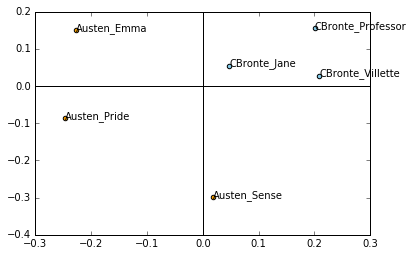

In [56]:
import pandas
  
vectorizer = CountVectorizer(input='filename', min_df=1, stop_words='english')
dtm = vectorizer.fit_transform(filenames)
vocab = vectorizer.get_feature_names()

from sklearn.metrics.pairwise import cosine_similarity
dist = 1- cosine_similarity(dtm)
round_dist = np.round(dist, 4)
# pandas.DataFrame(round_dist, filenames, filenames)

import os
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
% matplotlib inline

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)

xs, ys = pos[:, 0], pos[:, 1]
names = [os.path.basename(fn).replace('.txt', '') for fn in filenames]
for x, y, name in zip(xs, ys, names):
    color = 'orange' if 'Austen' in name else 'skyblue'
    plt.scatter(x, y, c=color)
    plt.text(x, y, name)
plt.axhline(0, color='black') #agregar linea eje X
plt.axvline(0, color='black') #agregar linea eje Y
plt.show()

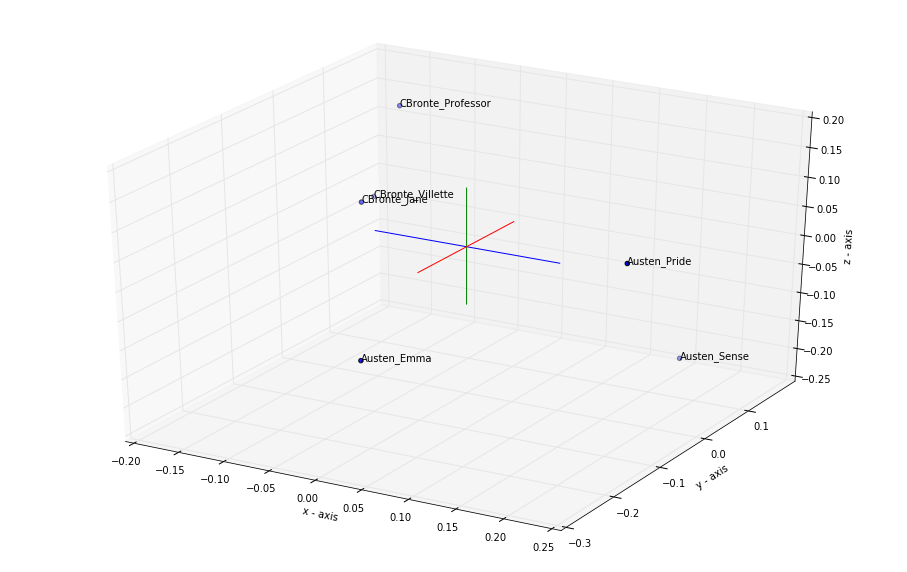

In [95]:
import pandas
  
vectorizer = CountVectorizer(input='filename', min_df=1, stop_words='english')
dtm = vectorizer.fit_transform(filenames)
vocab = vectorizer.get_feature_names()

from sklearn.metrics.pairwise import cosine_similarity
dist = 1- cosine_similarity(dtm)
round_dist = np.round(dist, 4)
# pandas.DataFrame(round_dist, filenames, filenames)

import os
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
% matplotlib inline

mds = MDS(n_components=3, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pos[:, 0], pos[:, 1], pos[:, 2])
for x, y, z, s in zip(pos[:, 0], pos[:, 1], pos[:, 2], names):
    ax.text(x, y, z, s)

ax.set_xlabel('x - axis')
ax.set_ylabel('y - axis')
ax.set_zlabel('z - axis')

x = np.linspace(-0.1, 0.1)
y = np.linspace(0, 0)
z = np.linspace(0, 0)
ax.plot(x, y, z)
ax.plot(y, z, x)
ax.plot(z, x, y)

plt.show()